## 2. Brief description of our data

Importing our data and showing its initial features:

In [50]:
import pandas as pd

filepath = 'data/World Happiness Report 2023.csv'
data = pd.read_csv(filepath)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

## 4. Data cleaning and feature engineering

### Removing columns that refer to previous data analyses.

In [51]:
data = data.drop(['Standard error of ladder score', 
                 'upperwhisker',
                 'lowerwhisker',
                 'Ladder score in Dystopia',
                 'Explained by: Log GDP per capita',
                 'Explained by: Healthy life expectancy',
                 'Explained by: Healthy life expectancy',
                 'Explained by: Freedom to make life choices',
                 'Explained by: Generosity',
                 'Explained by: Perceptions of corruption',
                 'Explained by: Social support',
                 'Dystopia + residual'],
                 axis = 1)

# Note: the argument "axis = 1" refers to columns. "axis = 0" would refer to rows

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  137 non-null    object 
 1   Ladder score                  137 non-null    float64
 2   Logged GDP per capita         137 non-null    float64
 3   Social support                137 non-null    float64
 4   Healthy life expectancy       136 non-null    float64
 5   Freedom to make life choices  137 non-null    float64
 6   Generosity                    137 non-null    float64
 7   Perceptions of corruption     137 non-null    float64
dtypes: float64(7), object(1)
memory usage: 8.7+ KB


### Renaming columns

In [52]:
data = data.rename(columns = {'Country name': 'Country',
                              'Ladder score': 'Happiness score',
                              'Logged GDP per capita': 'GDP/capita',
                              'Freedom to make life choices': 'Freedom of choice'})

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    137 non-null    object 
 1   Happiness score            137 non-null    float64
 2   GDP/capita                 137 non-null    float64
 3   Social support             137 non-null    float64
 4   Healthy life expectancy    136 non-null    float64
 5   Freedom of choice          137 non-null    float64
 6   Generosity                 137 non-null    float64
 7   Perceptions of corruption  137 non-null    float64
dtypes: float64(7), object(1)
memory usage: 8.7+ KB


### Localizing and replacing null values

In [55]:
data[data.isnull().any(axis = 1)]

,Country,Happiness score,GDP/capita,Social support,Healthy life expectancy,Freedom of choice,Generosity,Perceptions of corruption
98,State of Palestine,4.908,8.716,0.859,NaN,0.694,-0.132,0.836


In [56]:
palestine_hle_mean = data['Healthy life expectancy'].mean()
data = data.fillna(value = palestine_hle_mean)

data[data['Country'] == 'State of Palestine']

,Country,Happiness score,GDP/capita,Social support,Healthy life expectancy,Freedom of choice,Generosity,Perceptions of corruption
98,State of Palestine,4.908,8.716,0.859,64.967632,0.694,-0.132,0.836


In [6]:
data.describe()

,Happiness score,GDP/capita,Social support,Healthy life expectancy,Freedom of choice,Generosity,Perceptions of corruption
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,5.539796,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401
std,1.139929,1.207302,0.129222,5.729210,0.112371,0.141707,0.176956
min,1.859000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000
25%,4.724000,8.591000,0.722000,60.698000,0.724000,-0.074000,0.668000
50%,5.684000,9.567000,0.827000,65.825000,0.801000,0.001000,0.774000
75%,6.334000,10.540000,0.896000,69.350000,0.874000,0.117000,0.846000
max,7.804000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000


### Re-scaling attributes

In [58]:
data.head(10)

,Country,Happiness score,GDP/capita,Social support,Healthy life expectancy,Freedom of choice,Generosity,Perceptions of corruption
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379
5,Sweden,7.395,10.883,0.939,72.150,0.948,0.165,0.202
6,Norway,7.315,11.088,0.943,71.500,0.947,0.141,0.283
7,Switzerland,7.240,11.164,0.920,72.900,0.891,0.027,0.266
8,Luxembourg,7.228,11.660,0.879,71.675,0.915,0.024,0.345
9,New Zealand,7.123,10.662,0.952,70.350,0.887,0.175,0.271


In [112]:
from sklearn.preprocessing import StandardScaler

## Sampling numeric columns
numeric_columns = data.drop('Country', axis=1).columns

## Rescaling numeric columns
scaler = StandardScaler()
rescaled_data = data.copy()
rescaled_data[numeric_columns] = scaler.fit_transform(rescaled_data[numeric_columns])

rescaled_data.head(10)

,Country,Happiness score,GDP/capita,Social support,Healthy life expectancy,Freedom of choice,Generosity,Perceptions of corruption
0,Finland,1.993557,1.115818,1.319824,1.083056,1.550602,-0.293442,-3.082101
1,Denmark,1.801616,1.257145,1.203319,1.100574,1.309445,0.790215,-3.002695
2,Iceland,1.752309,1.202277,1.428562,1.240722,1.327309,1.335585,-0.325573
3,Israel,1.702123,0.988624,1.117882,1.354067,0.192978,-0.321773,-0.098699
4,Netherlands,1.640490,1.240518,1.016911,1.153130,0.889654,1.349751,-1.964743
5,Sweden,1.633446,1.191469,1.086814,1.258241,1.434490,1.009780,-2.968664
6,Norway,1.563009,1.361893,1.117882,1.144371,1.425558,0.839794,-2.509243
7,Switzerland,1.496974,1.425074,0.939241,1.389629,0.925380,0.032363,-2.605664
8,Luxembourg,1.486408,1.837415,0.620794,1.175028,1.139742,0.011115,-2.157587
9,New Zealand,1.393959,1.007745,1.187785,0.942908,0.889654,1.080607,-2.577305


(array([ 2.,  0.,  6., 10., 17., 25., 24., 31., 13.,  9.]),
 array([-3.24081938, -2.7173817 , -2.19394402, -1.67050634, -1.14706866,
        -0.62363098, -0.1001933 ,  0.42324438,  0.94668206,  1.47011974,
         1.99355742]),
 <BarContainer object of 10 artists>)

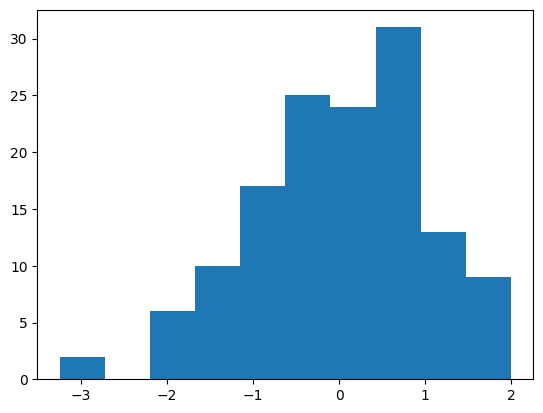

In [104]:
plt.hist(rescaled_data['Happiness score'])

In [107]:
print(data['Happiness score'].mean())
print(rescaled_data['Happiness score'].mean())

5.539795620437956
2.5932216633580297e-16


### Looking for outliers

In [113]:
## Function to detect outliers
def detect_outliers_z_score(df_column, threshold):
    
    '''
    df_column: column of a data frame with standard-scaled values
    threshold: threshold value
    '''
    
    ## Identifying outliers
    outliers = []
    for score in df_column:
        index = list(df_column).index(score)
        if score < -threshold:
            outliers.append(df_column[index])
        elif score > threshold:
            outliers.append(df_column[index])

    return outliers

threshold = 3
outliers_dict = {}
for column in numeric_columns:
    outliers = detect_outliers_z_score(rescaled_data[column], threshold)
    outliers_dict[column] = outliers

print('Outliers:')
outliers_dict

Outliers:


{'Happiness score': [-3.240819380486641],
 'GDP/capita': [-3.261147548346835],
 'Social support': [-3.557856157681139],
 'Healthy life expectancy': [],
 'Freedom of choice': [-3.62087544144848],
 'Generosity': [3.6020584537617704, 3.3187493237187913],
 'Perceptions of corruption': [-3.0821012297790795,
  -3.002695080909882,
  -3.286288469728444]}

(-4.0, 4.0)

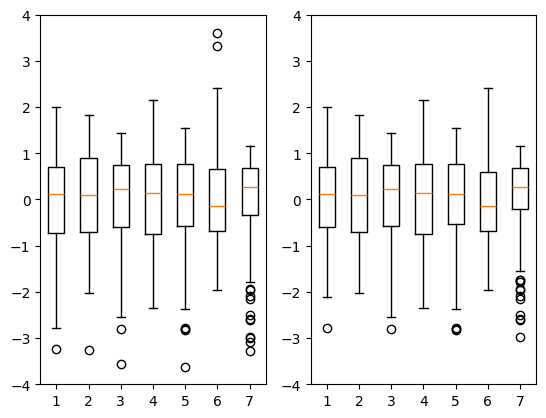

In [136]:
import numpy as np

clean_data = rescaled_data.copy()

## Replacing outliers by mean values
for column in numeric_columns:
    for outlier in outliers_dict[column]:
        index = list(rescaled_data[column]).index(outlier) # Identifying the index of the outlier
        clean_data.at[index, column] = rescaled_data[column].mean()

plt.subplot(1, 2, 1)
plt.boxplot(rescaled_data[numeric_columns])
plt.ylim(-4,4)
plt.subplot(1, 2, 2)
plt.boxplot(clean_data[numeric_columns])
plt.ylim(-4,4)

### Making a pairplot to visualize correlations

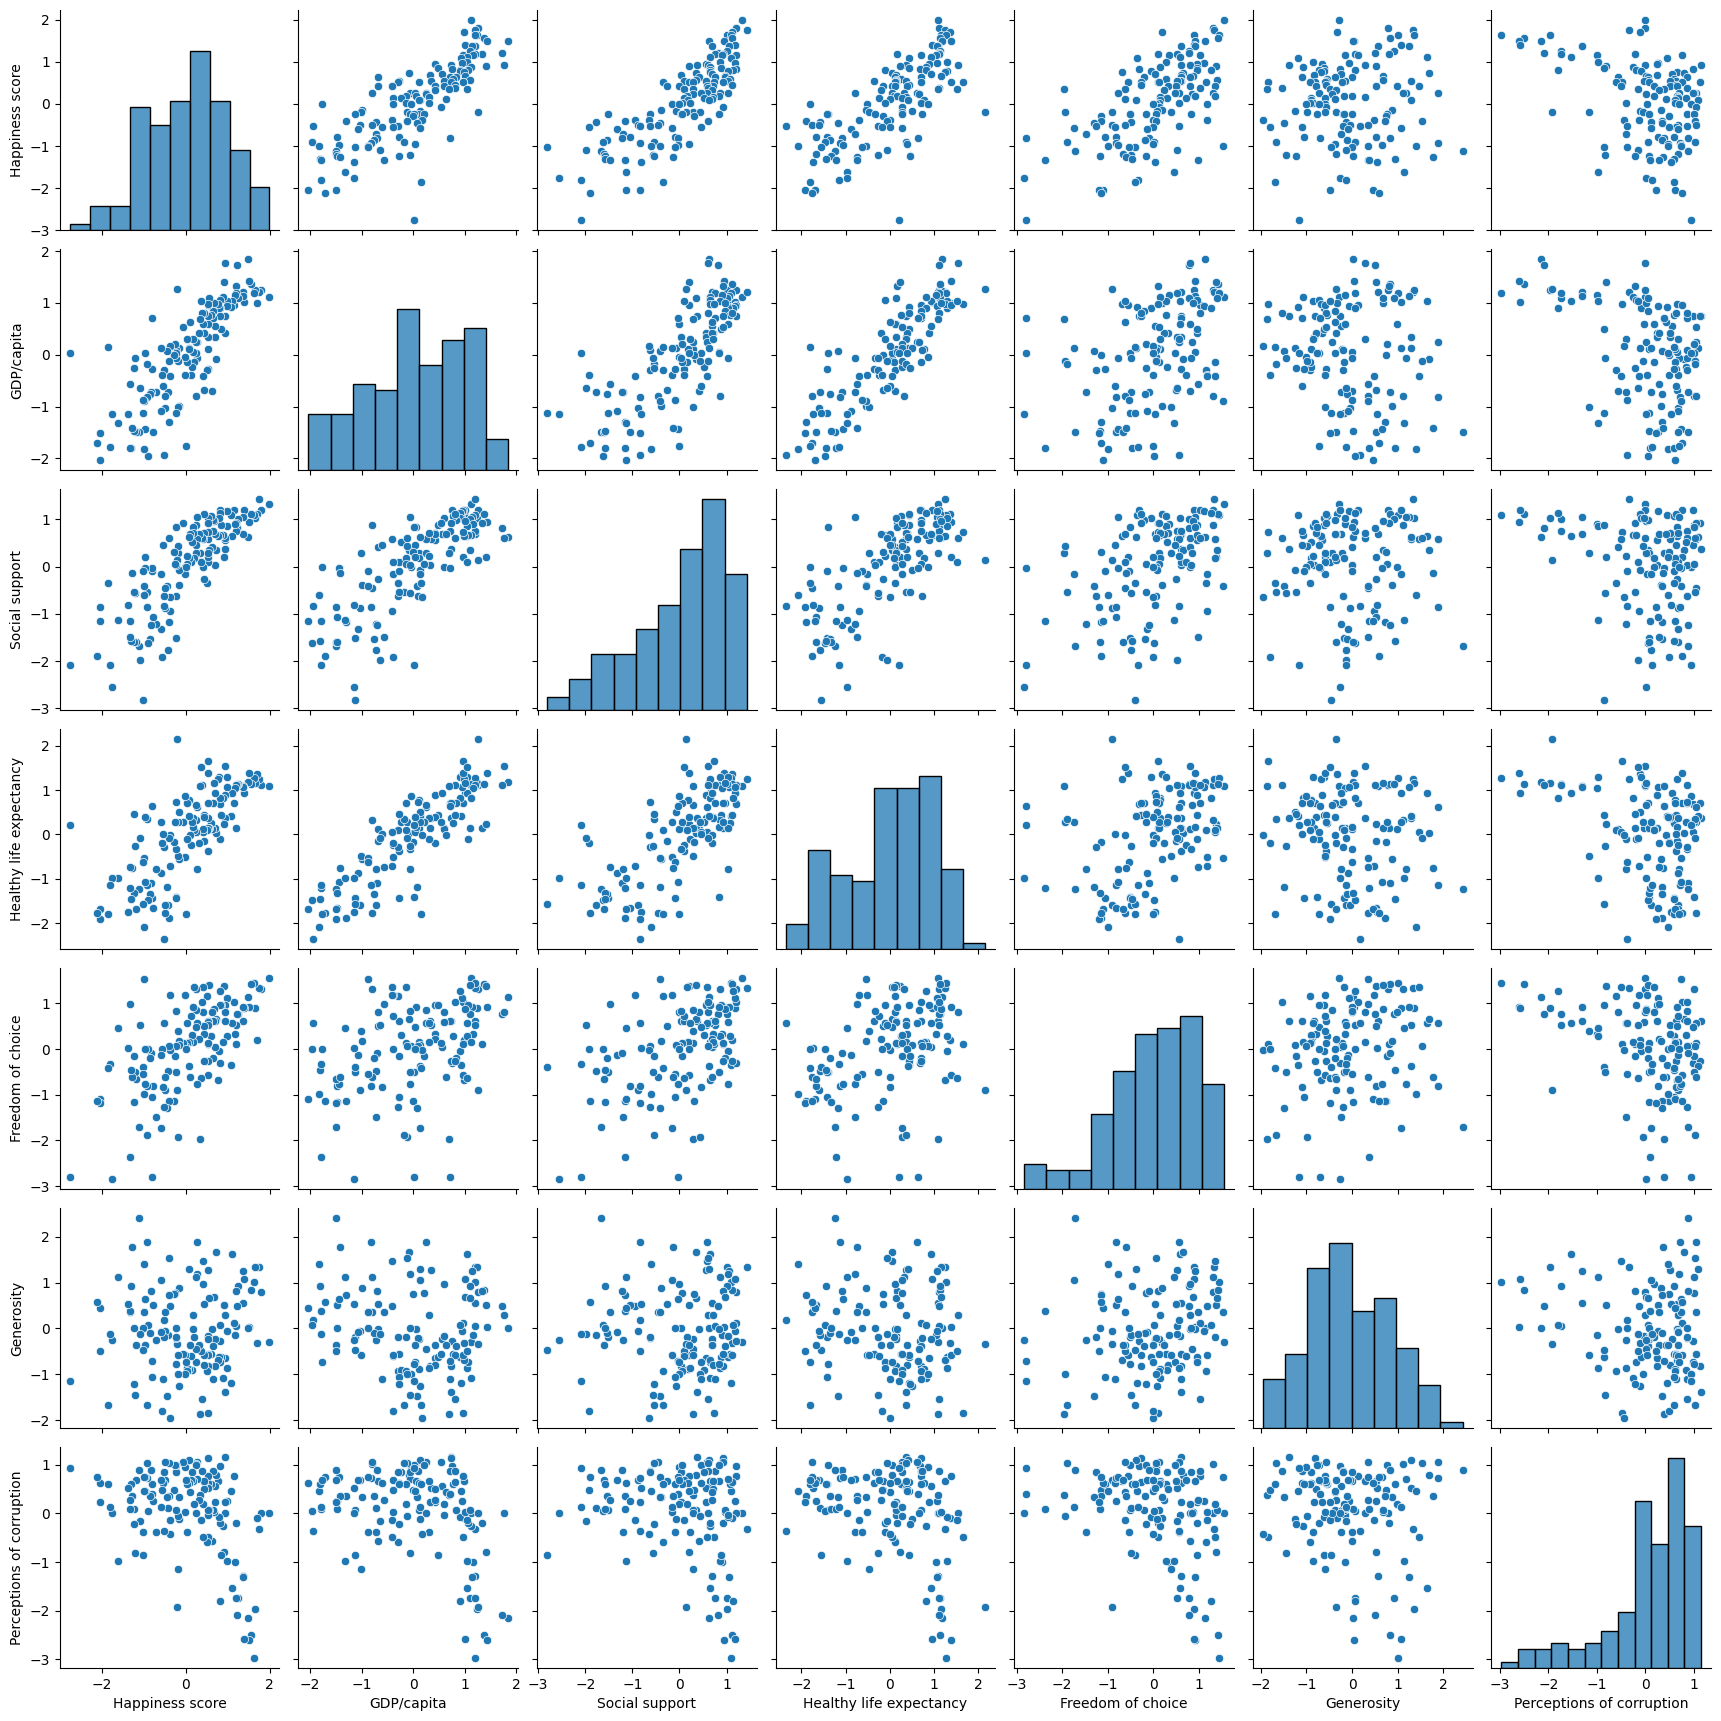

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(clean_data)
plt.savefig('correlations.png', dpi = 300)

### Making a heat map to quantify correlations

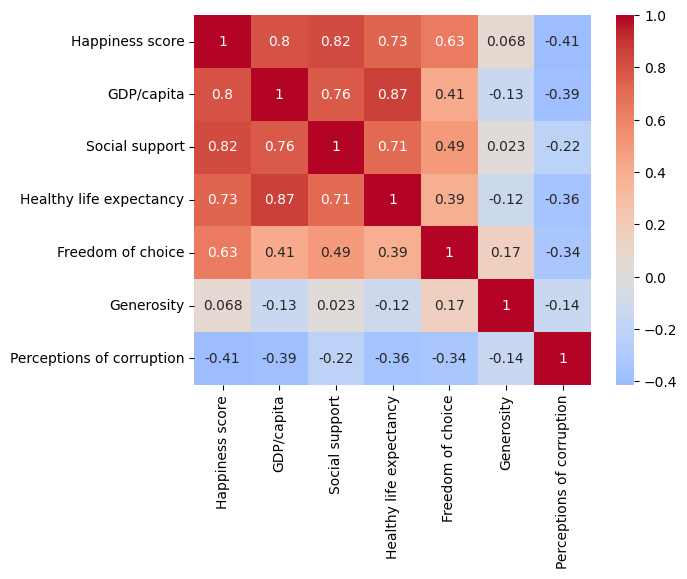

In [200]:
corr_matrix = clean_data[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)

plt.savefig('heatmap.png', dpi = 300)

## 5. Hypothesis testing

### Sampling Happiness scores of Europe and America

Asia:
Number of countries in the sample:  35 of 48
Mean Happiness score:  -0.11307841492366978
Std:  0.8357108426092205


Europe:
Number of countries in the sample:  42 of 50
Mean Happiness score:  0.7502959765962951
Std:  0.6353833308393687


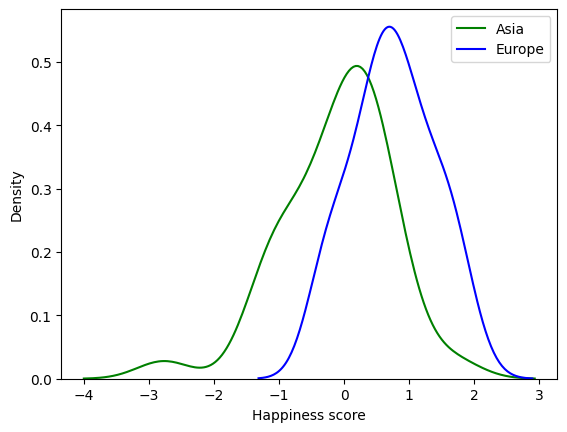

In [194]:
## Asia
Asia = [
    "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh",
    "Bhutan", "Cambodia", "China", "Cyprus", "Georgia",
    "India", "Indonesia", "Iran", "Iraq", "Israel", "Japan", "Jordan",
    "Kazakhstan", "Kuwait", "Kyrgyzstan", "Laos", "Lebanon", "Malaysia",
    "Maldives", "Mongolia", "Myanmar", "Nepal", "Pakistan", "Philippines",
    "Qatar", "Russia", "Saudi Arabia", "Singapore", "South Korea", "Sri Lanka",
    "Syria", "Taiwan", "Tajikistan", "Thailand", "Timor-Leste", "Turkey",
    "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"
]

Asia_data = clean_data[clean_data['Country'].isin(Asia)]
Asia_hs = Asia_data["Happiness score"]

## Europe
Europe = [
    "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", 
    "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", 
    "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", 
    "Georgia", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", 
    "Kazakhstan", "Kosovo", "Latvia", "Lithuania", "Luxembourg", "Malta", 
    "Moldova", "Montenegro", "Netherlands", "North Macedonia", "Norway", 
    "Poland", "Portugal", "Romania", "Russia", "Serbia", "Slovakia", "Slovenia", 
    "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom"
]

Europe_data = clean_data[clean_data['Country'].isin(Europe)]
Europe_hs = Europe_data["Happiness score"]

print("Asia:")
print("Number of countries in the sample: ", Asia_hs.shape[0], 'of 48')
print("Mean Happiness score: ", Asia_hs.mean())
print("Std: ", Asia_hs.std())
print("\n")
print("Europe:")
print("Number of countries in the sample: ", Europe_hs.shape[0], 'of 50')
print("Mean Happiness score: ", Europe_hs.mean())
print("Std: ", Europe_hs.std())

## Plotting distributions
sns.kdeplot(data=Asia_hs, color = "green", fill=False, label = "Asia")
sns.kdeplot(data=Europe_hs, color = "blue", fill=False, label = "Europe")
plt.legend(loc="upper right")

plt.savefig('Asian_Europe-distributions.png', dpi = 300, bbox_inches="tight")

### Testing the Hypothesis

In [196]:
from scipy import stats

## t and p-values
t_value, p_value = stats.ttest_ind(Europe_hs, Asia_hs)

print('Test results: \n')
print("t-value = ",t_value)
print("p-value = ", p_value)

Test results: 

t-value =  5.146360064489117
p-value =  2.0636714146474547e-06
